In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [1]:
# (1) Since the matrix R contains a single non-zero element n in the (J, J)th entry,
# the product A*R is the matrix having at the Jth column, the Jth row
# from matrix A multiplied by n (let's denote this vector as c), and zeroes everywhere else.
# The final product 2 A* R (Ax - b) = 2 * c * (Ax - b)[J]
# Now, (Ax - b)[J] = <A[J], x> - b[J]
# The computational cost of this operation is O(n). However, we must perform this 
# operation several times to take the average. Lets compute the sample size.
# We sample uniformly, ~ U({1, ..., n}). The standard deviation is sqrt((n^2 - 1) / 12).
# Let m be our sample size, then by the CLT, the distribution of the sample averages is normal,
# with standard deviation equal to the original deviation divided by square root of the sample size,
# i.e. in our case the standard deviation of the sample averages from the distribution mean
# will be sqrt((n^2 - 1) / (12 * m))
# Now, say we want the average to be within 5% from the normal distribution mean, with 95% probability
# So we have 2 * sigma = 2 * sqrt((n^2 - 1) / (12 * m)) = 0.05 * n
# Solving for m, we get m = 1600 / 12 * sqrt(n^2 - 1) / n < 134
# So we can take the sample size constant 134, trading off runtime for accuracy
# and the resulting algorithm will still have complexity O(n),
# with sample averages converging to the distribution mean with high probability


In [ ]:
def solve():
    print('Exact solution:')
    print(np.linalg.solve(A, b))
    # initialize x and g with random values from -1 to 1
    x = (np.random.rand(n) - 0.5) * 2.
    g = (np.random.rand(n) - 0.5) * 2.
    norm = np.linalg.norm(g, 2)
    sample_size = 134
    iteration_count = 0
    # if iteration_count exceeds 1,000,000 we consider the process divergent
    x_ticks = []
    x_vals = []
    while norm > 0.001 and iteration_count < 1000000:
        iteration_count += 1
        for _ in range(sample_size):
            J = random.randrange(0, n)
            g += 2 * A[J] * n * (np.dot(A[J], x) - b[J])
        g = g / sample_size
        x = x - epsilon * g
        norm = np.linalg.norm(g, 2)
        if iteration_count % 500 == 0:
            # print('count', iteration_count, 'norm', norm)
            x_ticks.append(iteration_count)
            x_vals.append(norm)
    print('Calculated solution')
    print(x)
    print('\n\nnorm: ', norm, 'total iterations:', iteration_count)
    plt.xlabel('iterations')
    plt.ylabel('norm')
    plt.title(f'matrix size {n}')
    plt.plot(x_ticks, x_vals)
    plt.show()

In [ ]:
# Populate the matrix with the random independent Gaussian entries with mean 0 and variance 1/n
def randomly_populate_matrix():
    for i in range(n):
        for j in range(n):
            A[i, j] = np.random.normal(0, np.sqrt(1 / n))

In [ ]:
# Set the globals for the run. Note that we set epsilon 1 / s^2 where s is the largest eigenvalue
def set_globals(_n):
    global n
    global A
    global b
    n = _n
    A = np.empty([n, n])
    randomly_populate_matrix()
    b = np.empty(n)
    b.fill(0)
    b[0] = 1
    eigvals = np.linalg.eigvals(np.matmul(A.transpose(), A))
    maximal_eigval = eigvals.max()
    global epsilon
    epsilon = 1 / (maximal_eigval ** 2)
    print('maximal_eigval', maximal_eigval)
    print('epsilon', epsilon)

maximal_eigval 3.5426021120050137
epsilon 0.07968108618014327
Exact solution:
[-0.40063981 -0.82445332 -1.31011786 -0.90603146  1.58772065 -0.25340649
 -0.37155982 -1.65228792  0.06844963 -0.37852431]
Calculated solution
[-0.39704027 -0.82100754 -1.30716532 -0.89868276  1.57945995 -0.25437391
 -0.37032691 -1.63859129  0.06983631 -0.37590475]


norm:  0.0008507865546992023 total iterations: 1715


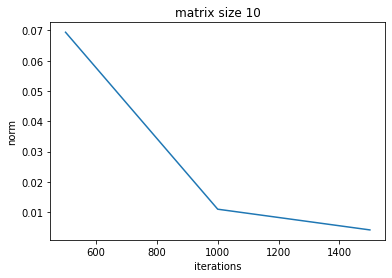

In [ ]:
# Now lets verify that our algorithm works correctly. To do this, lets run it for randomly populated matrices
# of various order and compare with the numpy built in solutuin
set_globals(10)
solve()

maximal_eigval 3.4953972156732975
epsilon 0.0818477844816949
Exact solution:
[-0.68577788  1.95748694  0.22368729 -0.54934081 -0.32713821 -1.16840558
 -0.33752536  0.63349564  0.60875801  0.48248025  0.33508893 -0.06852655
 -0.46474528  0.10347022 -0.18943685  1.17539032 -0.05942428  0.62753369
 -0.36493763  0.57071618]
Calculated solution
[-0.6801527   1.94994619  0.21252183 -0.55257258 -0.32448895 -1.15891195
 -0.34124479  0.63389373  0.6071186   0.47247419  0.33288706 -0.07151603
 -0.46242612  0.10283289 -0.18798914  1.175082   -0.06366885  0.62858209
 -0.35357732  0.57128782]


norm:  0.0009790032271048148 total iterations: 3481


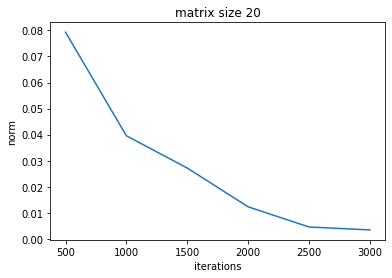

In [ ]:
set_globals(20)
solve()

maximal_eigval 4.023265253301853
epsilon 0.06177925503011108
Exact solution:
[-0.34811625 -0.37009844 -0.45976761  0.2529551   0.15050231  0.88159619
 -1.13732181  1.12976405 -0.36081873 -0.08403936  0.19664596  0.34052937
  0.70789368 -0.232008   -0.29106414 -0.07721848  0.70480316 -0.10150773
 -0.62795015 -0.74840428  0.03959405 -0.26878775  0.38246828 -0.47973824
  0.49329079  0.14662    -0.04805834  0.59424065  0.10660538  0.16376467]
Calculated solution
[-0.33759724 -0.37479345 -0.46760923  0.25089157  0.14576428  0.8576442
 -1.13557803  1.12449249 -0.37561001 -0.07475287  0.20097111  0.32255481
  0.69803307 -0.24381655 -0.28804533 -0.0645573   0.70127189 -0.09186502
 -0.63548068 -0.73846961  0.04219894 -0.28004874  0.35683201 -0.46730909
  0.49683446  0.14485034 -0.05301225  0.55822638  0.10848938  0.18689744]


norm:  0.0009768084245780101 total iterations: 37877


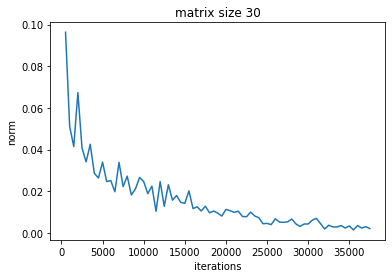

In [ ]:
set_globals(30)
solve()

maximal_eigval 3.6981143633760007
epsilon 0.0731205290535172
Exact solution:
[-5.52478818e+00 -1.49788878e+00 -8.16618378e+00  9.90541799e+00
 -8.47006109e+00  1.91999031e+00 -4.06819870e+00 -8.58710582e+00
  2.69248666e+00  1.60397603e+01 -1.51783544e-02  7.43673166e+00
  7.62089660e+00  2.82513259e+00 -1.06836296e+01 -1.53325709e+00
  2.84438409e+00 -5.22465611e+00  2.49183197e+00  6.00179944e+00
 -3.57433544e+00  4.97314343e+00 -1.77643686e+00  5.62999945e+00
 -2.08573981e+00 -7.28200846e+00 -6.07970610e+00  9.88893090e+00
  4.60751206e+00  1.08585033e+01 -1.72636869e+00  3.81523771e+00
  2.72383967e-01  1.76412977e+01  6.18906122e+00 -1.06082939e+00
 -1.22208044e+00 -8.80530618e-01  5.92265548e-02 -6.22328087e+00
 -3.71220986e+00 -3.51250212e+00  4.07732680e+00  4.94820408e+00
  7.86209658e+00 -7.05593385e+00  5.32615816e+00 -2.04656039e-01
  5.99873153e+00  6.44282962e+00 -1.29993424e+00  7.06225721e+00
  1.39589897e+01 -5.27606835e+00  8.91907044e+00 -4.15132270e+00
 -6.54152232e

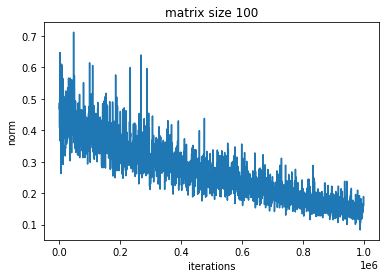

In [ ]:
set_globals(100)
solve()

maximal_eigval 3.899618030955921
epsilon 0.06575909995673991
Exact solution:
[ 1.66257325e+00  5.32364591e-02 -5.96008873e+00  3.01582397e+00
 -8.94012241e-01 -2.49654540e+00 -4.83156504e-01  3.64570426e+00
 -1.36959904e+00  2.44419560e+00  1.30305988e+00 -2.38694632e+00
 -4.30245844e+00  5.50470180e-01 -2.97468330e+00  6.41328351e+00
  2.59118995e+00 -5.74093281e+00 -1.56753492e+00 -3.71659957e+00
 -7.29578738e+00 -1.13136703e+01 -1.87657636e+00  8.58780435e+00
  6.24085688e+00  1.99791330e+00 -6.18088375e+00 -5.35860351e+00
  2.07492169e-01  2.77150617e+00  6.51676509e-02 -3.84719678e+00
 -3.44526699e+00  2.45206102e-01  4.47678605e+00  7.22541379e-01
  3.02316443e+00  6.31472663e+00 -3.81111279e-01 -1.04195220e+00
  2.74138255e+00  5.53258877e+00  2.26024719e-01 -1.09635379e+00
 -6.08171110e-01 -1.29396597e+00  3.28141727e-02 -2.26254316e-01
 -2.13954581e+00 -4.24386906e+00 -3.26299448e+00 -1.55743451e+00
 -1.39271099e+00 -3.89624837e+00 -7.77120936e+00  1.61704127e+00
  2.90646460e

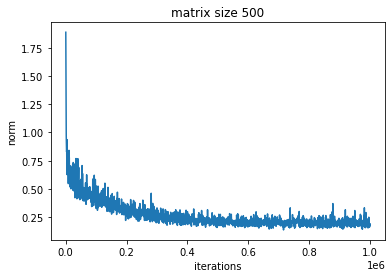

In [ ]:
set_globals(500)
solve()

In [ ]:
# We see that the algorithm works. Note that we selected epsilon = 1/s^2, where s is the largest eigenvalue, 
# just like in a regular Jacobi iteration
